<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/MateuszRajca_poprawa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [2]:
transition_probs = {
    's0': {
        'a0': {'s1': 1},
    },
    's1': {
        'a1': {'s0': 1},
        'a2': {'s2': 1},
        'a0': {'s4': 1}
    },
    's2': {
        'a3': {'s1': 1},
        'a0': {'s3': 1}
    },
    's3': {
        'a1': {'s2': 1},
        'a3': {'s4': 1}
    },
    's4': {
        'a1': {'s1': 1},
        'a2': {'s3': 1}
    }
}
rewards = {
    's3': {'a3': {'s4': +100}},
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [3]:
mdp.reset()

's0'

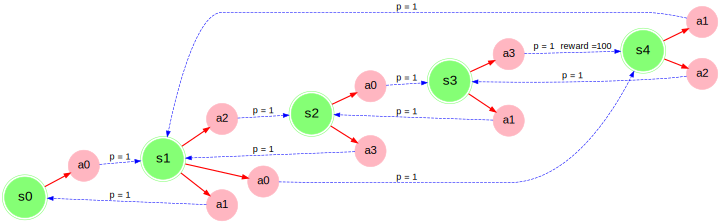

In [16]:
from mdp import has_graphviz


from IPython.display import display
if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [18]:
import random
state = mdp.reset()

for t in range(200):
  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation
  print(t, observation, reward, done)

0 s1 0.0 False
1 s0 0.0 False
2 s1 0.0 False
3 s4 0.0 False
4 s1 0.0 False
5 s2 0.0 False
6 s3 0.0 False
7 s4 100 False
8 s3 0.0 False
9 s4 100 False
10 s1 0.0 False
11 s2 0.0 False
12 s3 0.0 False
13 s4 100 False
14 s1 0.0 False
15 s0 0.0 False
16 s1 0.0 False
17 s4 0.0 False
18 s3 0.0 False
19 s4 100 False
20 s3 0.0 False
21 s4 100 False
22 s3 0.0 False
23 s2 0.0 False
24 s3 0.0 False
25 s4 100 False
26 s3 0.0 False
27 s2 0.0 False
28 s3 0.0 False
29 s2 0.0 False
30 s1 0.0 False
31 s4 0.0 False
32 s1 0.0 False
33 s4 0.0 False
34 s3 0.0 False
35 s2 0.0 False
36 s3 0.0 False
37 s4 100 False
38 s1 0.0 False
39 s0 0.0 False
40 s1 0.0 False
41 s0 0.0 False
42 s1 0.0 False
43 s0 0.0 False
44 s1 0.0 False
45 s4 0.0 False
46 s1 0.0 False
47 s4 0.0 False
48 s1 0.0 False
49 s0 0.0 False
50 s1 0.0 False
51 s0 0.0 False
52 s1 0.0 False
53 s0 0.0 False
54 s1 0.0 False
55 s2 0.0 False
56 s3 0.0 False
57 s2 0.0 False
58 s3 0.0 False
59 s4 100 False
60 s1 0.0 False
61 s4 0.0 False
62 s1 0.0 False
63

In [6]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [7]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [8]:
gamma = 0.95
num_iter = 100
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 100.0 {'s0': 0, 's1': 0, 's2': 0, 's3': 0, 's4': 0}
1 95.0 {'s0': 0.0, 's1': 0.0, 's2': 0.0, 's3': 100.0, 's4': 0.0}
2 90.25 {'s0': 0.0, 's1': 0.0, 's2': 95.0, 's3': 100.0, 's4': 95.0}
3 85.7375 {'s0': 0.0, 's1': 90.25, 's2': 95.0, 's3': 190.25, 's4': 95.0}
4 81.45062499999997 {'s0': 85.7375, 's1': 90.25, 's2': 180.73749999999998, 's3': 190.25, 's4': 180.73749999999998}
5 77.37809374999998 {'s0': 85.7375, 's1': 171.70062499999997, 's2': 180.73749999999998, 's3': 271.70062499999995, 's4': 180.73749999999998}
6 73.50918906250001 {'s0': 163.11559374999996, 's1': 171.70062499999997, 's2': 258.11559374999996, 's3': 271.70062499999995, 's4': 258.11559374999996}
7 69.83372960937498 {'s0': 163.11559374999996, 's1': 245.20981406249996, 's2': 258.11559374999996, 's3': 345.20981406249996, 's4': 258.11559374999996}
8 66.3420431289062 {'s0': 232.94932335937494, 's1': 245.20981406249996, 's2': 327.94932335937494, 's3': 345.20981406249996, 's4': 327.94932335937494}
9 63.02494097246091 {'s0': 232.94

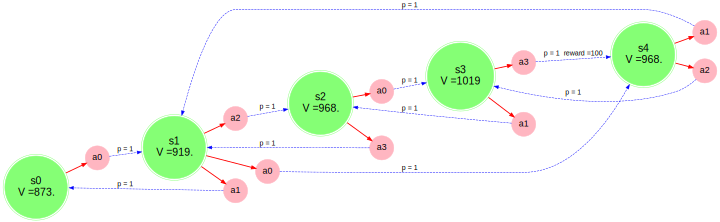

In [9]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))